## Project Description
You work at a startup that sells food products. You need to investigate user behavior for the company's app.

Description of the data
- Each log entry is a user action or an event.
- EventName — event name
- DeviceIDHash — unique user identifier
- EventTimestamp — event time
- ExpId — experiment number: 246 and 247 are the control groups, 248 is the test group


### Step 1. Open the data file and read the general information

In [1]:
#data preprocessing and upload
#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import datetime as dt

sns.set()

#a function that provides information about each file
def get_information(df):
    print('Head:')
    print()
    display(df.head())
    print('-' * 20)
    print('Info:')
    print()
    display(df.info())
    print('-' * 20)
    print('Describe:')
    print()
    display(df.describe())
    print('-' * 20)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na_df(df,4))
    print('-'*20)
    print('Shape:')
    print(df.shape)
    print('-'*20)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows. \n'.format(df.duplicated().sum()) + "\033[0m")    

#getting percentages of missing values by column
def get_percent_of_na_df(df, num):
    df_nulls = pd.DataFrame(df.isna().sum(),columns=['Missing Values'])
    df_nulls['Percent of Nulls'] = round(df_nulls['Missing Values'] / df.shape[0],num) *100
    return df_nulls

#getting percentages of missing values
def get_percent_of_na(df):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index,s.values):
        
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent,num,num_of_nulls))
        
    if count !=0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")

In [2]:
data = pd.read_csv('logs_exp_us.csv', sep="\t")
                   
display(data)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


### Step 2. Prepare the data for analysis
- Rename the columns in a way that's convenient for you
- Check for missing values and data types. Correct the data if needed
- Add a date and time column and a separate column for dates

In [3]:
get_information(data)

Head:



,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248


--------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


None

--------------------
Describe:



,DeviceIDHash,EventTimestamp,ExpId
count,2.441260e+05,2.441260e+05,244126.000000
mean,4.627568e+18,1.564914e+09,247.022296
std,2.642425e+18,1.771343e+05,0.824434
min,6.888747e+15,1.564030e+09,246.000000
25%,2.372212e+18,1.564757e+09,246.000000
50%,4.623192e+18,1.564919e+09,247.000000
75%,6.932517e+18,1.565075e+09,248.000000
max,9.222603e+18,1.565213e+09,248.000000


--------------------


,EventName
count,244126
unique,5
top,MainScreenAppear
freq,119205



Columns with nulls:


,Missing Values,Percent of Nulls
EventName,0,0.0
DeviceIDHash,0,0.0
EventTimestamp,0,0.0
ExpId,0,0.0


--------------------
Shape:
(244126, 4)
--------------------
Duplicated:
We have 413 duplicated rows. 



In [4]:
#drop duplicate rows since they are less than .01 % of the dataframe
data.drop_duplicates(inplace=True)
display(data)

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


In [5]:
#converting epoch time
data['date_time'] = data['EventTimestamp'].apply(lambda x: pd.datetime.fromtimestamp(x))
data

<ipython-input-5-4434039225fa>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  data['date_time'] = data['EventTimestamp'].apply(lambda x: pd.datetime.fromtimestamp(x))


,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-24 21:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 04:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 04:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 04:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 04:48:42
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 14:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 14:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 14:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 14:14:58


In [6]:
data['date'] = data['date_time'].dt.date
data

,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-24 21:43:36,2019-07-24
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 04:11:42,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 04:48:42,2019-07-25
...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 14:12:25,2019-08-07
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 14:13:59,2019-08-07
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 14:14:43,2019-08-07
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 14:14:58,2019-08-07


In [7]:
#adding date time column
data['time']  = data['date_time'].dt.time
display(data)

,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date,time
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-24 21:43:36,2019-07-24,21:43:36
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 04:11:42,2019-07-25,04:11:42
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 04:48:42,2019-07-25,04:48:42
...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 14:12:25,2019-08-07,14:12:25
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 14:13:59,2019-08-07,14:13:59
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 14:14:43,2019-08-07,14:14:43
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 14:14:58,2019-08-07,14:14:58


#### Conclusion
We have 413 duplicated rows dropped from the data since it consisted of .01% of the dataframe
converted epoch time and added date and time column as event_date and event_time
no non null values indicated 

### Step 3. Study and check the data
- How many events are in the logs?
- How many users are in the logs?
- What's the average number of events per user?
- What period of time does the data cover? Find the maximum and the minimum date. Plot a histogram by date and time. Can you be sure that you have equally complete data for the entire period? Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. Find the moment at which the data starts to be complete and ignore the earlier section. What period does the data actually represent?
- Did you lose many events and users when excluding the older data? Make sure you have users from all three experimental groups.

In [8]:
data['event_year'] = data['date_time'].dt.year
data['event_month'] = data['date_time'].dt.month

mau_total = data.groupby(['event_year', 'event_month']).agg({'EventName': 'nunique'}).sum()

print('Events per month', int(mau_total))

Events per month 10


In [9]:
#how many events in the logs
event_sessions = data.groupby('EventName').agg({'EventName':'nunique'}).sum()
print('Average Events in logs:', int(event_sessions))

Average Events in logs: 5


In [10]:
event_sessions_total = data.groupby('EventName').agg({'EventName':'count'}).sum()
event_sessions_total

EventName    243713
dtype: int64

In [11]:
#average users in the logs
users_average= data.groupby(['DeviceIDHash']).agg({'DeviceIDHash':'nunique'}).sum()
print('Average Users in logs:', int(users_average))

Average Users in logs: 7551


In [12]:
#average number of events per user
users_per_event = data.groupby(['DeviceIDHash']).agg({'EventName':'count'})
users_per_event.sort_values(by='EventName', ascending=False).head(20)

,EventName
DeviceIDHash,
6304868067479728361,2307
197027893265565660,1998
4623191541214045580,1768
6932517045703054087,1439
1754140665440434215,1221
3337471580007169353,1186
7738058666231999878,888
1055544042902443290,854
4713748699910253089,824


In [13]:
TotalEvents_PerUser = data.groupby('DeviceIDHash').agg({'EventName':'count'}).mean()
TotalEvents_PerUser

EventName    32.275593
dtype: float64

In [14]:
print('Average events per user in logs:', TotalEvents_PerUser)

Average events per user in logs: EventName    32.275593
dtype: float64


In [15]:
#what period of time does the data cover?
data['duration_start'] = data['date_time'].min()
data['duration_end'] = data['date_time'].max()
display(data)


,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date,time,event_year,event_month,duration_start,duration_end
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-24 21:43:36,2019-07-24,21:43:36,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 04:11:42,2019-07-25,04:11:42,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 04:48:42,2019-07-25,04:48:42,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17
...,...,...,...,...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 14:12:25,2019-08-07,14:12:25,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 14:13:59,2019-08-07,14:13:59,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 14:14:43,2019-08-07,14:14:43,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 14:14:58,2019-08-07,14:14:58,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17


In [16]:
data['session_duration'] = (data['duration_end'] - data['duration_start'])
data

,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date,time,event_year,event_month,duration_start,duration_end,session_duration
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-24 21:43:36,2019-07-24,21:43:36,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 04:11:42,2019-07-25,04:11:42,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 04:48:42,2019-07-25,04:48:42,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
...,...,...,...,...,...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 14:12:25,2019-08-07,14:12:25,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 14:13:59,2019-08-07,14:13:59,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 14:14:43,2019-08-07,14:14:43,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 14:14:58,2019-08-07,14:14:58,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41


In [17]:
print("Average Session Length is:", data['session_duration'].mean()) 
print(data['session_duration'].value_counts(normalize=True).head(10))

Average Session Length is: 13 days 16:31:40.999999
13 days 16:31:41    1.0
Name: session_duration, dtype: float64


In [18]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

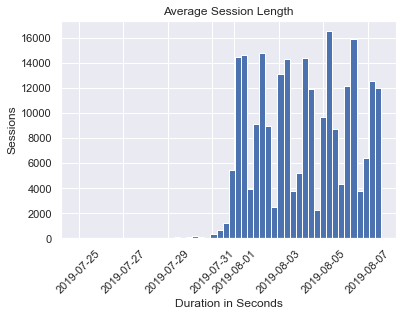

In [19]:
data['date_time'].hist(bins=50)
plt.xticks(rotation=45)
plt.title("Average Session Length")
plt.ylabel("Sessions")
plt.xlabel("Duration in Seconds")
plt.show()



##### Conclusion
The period of time that the data covers starts on 07/25-08/07/2019 with the largest number of users being active from 07/29-08/07/2019. The posible reason for a small number of events in the logs before august 1st might have been because people werent aware of the sites existance. 

In [20]:
#Did you lose many events and users when excluding the older data? 
#Make sure you have users from all three experimental groups.

# monthly cohorts
#monthly_orders = data.groupby(['date_time', 'date']).agg({'ExpId':'nunique'})
#monthly_orders_by_cohorts = monthly_orders.pivot_table(index='date_time', columns='date', values='ExpId', aggfunc='sum')
#display(monthly_orders_by_cohorts)

In [21]:
data['date'] = pd.to_datetime(data['date'])
new_data = data.loc[data['date'] > '2019-07-31']
new_data

,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date,time,event_year,event_month,duration_start,duration_end,session_duration
7622,MainScreenAppear,1180716372926977637,1564642801,247,2019-08-01 00:00:01,2019-08-01,00:00:01,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7623,MainScreenAppear,3848171933939347005,1564642802,246,2019-08-01 00:00:02,2019-08-01,00:00:02,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7624,MainScreenAppear,4499584756672479930,1564642809,246,2019-08-01 00:00:09,2019-08-01,00:00:09,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7625,MainScreenAppear,7221645881620243073,1564642809,248,2019-08-01 00:00:09,2019-08-01,00:00:09,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7626,OffersScreenAppear,4499584756672479930,1564642816,246,2019-08-01 00:00:16,2019-08-01,00:00:16,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
...,...,...,...,...,...,...,...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 14:12:25,2019-08-07,14:12:25,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 14:13:59,2019-08-07,14:13:59,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 14:14:43,2019-08-07,14:14:43,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
244124,MainScreenAppear,5746969938801999050,1565212498,246,2019-08-07 14:14:58,2019-08-07,14:14:58,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41


In [22]:
DeviceIdbyDateTotal = data.pivot_table(index='date_time', values='DeviceIDHash', aggfunc='count' )
DeviceIdbyDateTotal.head(8)

#Lost 6189 rows of data

,DeviceIDHash
date_time,
2019-07-24 21:43:36,1
2019-07-25 04:11:42,1
2019-07-25 04:28:47,2
2019-07-25 04:48:42,1
2019-07-25 04:48:43,1
2019-07-25 07:50:42,1
2019-07-25 13:14:37,1
2019-07-25 13:31:42,1


In [23]:
NewDeviceIdbyDateTotal = new_data.pivot_table(index='date_time', values='DeviceIDHash', aggfunc='count' )
NewDeviceIdbyDateTotal

,DeviceIDHash
date_time,
2019-08-01 00:00:01,1
2019-08-01 00:00:02,1
2019-08-01 00:00:09,2
2019-08-01 00:00:16,2
2019-08-01 00:00:19,1
...,...
2019-08-07 14:12:25,1
2019-08-07 14:13:59,1
2019-08-07 14:14:43,1


In [24]:
date_counts = data.pivot_table(index='EventName', values='DeviceIDHash', aggfunc='count' )
date_counts.head(40)

,DeviceIDHash
EventName,
CartScreenAppear,42668
MainScreenAppear,119101
OffersScreenAppear,46808
PaymentScreenSuccessful,34118
Tutorial,1018


In [25]:
new_date_counts = new_data.pivot_table(index='EventName', values='DeviceIDHash', aggfunc='count' )
new_date_counts.head(40)

,DeviceIDHash
EventName,
CartScreenAppear,41934
MainScreenAppear,114185
OffersScreenAppear,45367
PaymentScreenSuccessful,33628
Tutorial,985


In [26]:
ExpIdCountOld = data.pivot_table(index='ExpId', values='DeviceIDHash', aggfunc='count' )
ExpIdCountOld

,DeviceIDHash
ExpId,
246,80181
247,77950
248,85582


In [27]:
ExpIdCountNew = new_data.pivot_table(index='ExpId', values='DeviceIDHash', aggfunc='count' )
ExpIdCountNew

,DeviceIDHash
ExpId,
246,77898
247,75280
248,82921


In [28]:
DateCount = data.groupby('date_time').agg('count') 
DateCount = data.pivot_table(index='date_time', values='DeviceIDHash',aggfunc='count') 
DateCount.sort_values(by='date_time',ascending=False)

,DeviceIDHash
date_time,
2019-08-07 14:15:17,1
2019-08-07 14:14:58,1
2019-08-07 14:14:43,1
2019-08-07 14:13:59,1
2019-08-07 14:12:25,1
...,...
2019-07-25 04:48:43,1
2019-07-25 04:48:42,1
2019-07-25 04:28:47,2


In [29]:
#DateCount.query[['date'] < '2019-07-31']
old_data = data.loc[data['date'] < '2019-08-01']
old_data

,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date,time,event_year,event_month,duration_start,duration_end,session_duration
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-24 21:43:36,2019-07-24,21:43:36,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 04:11:42,2019-07-25,04:11:42,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 04:48:42,2019-07-25,04:48:42,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
...,...,...,...,...,...,...,...,...,...,...,...,...
7617,MainScreenAppear,1180716372926977637,1564642788,247,2019-07-31 23:59:48,2019-07-31,23:59:48,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7618,OffersScreenAppear,1100162414441257562,1564642792,246,2019-07-31 23:59:52,2019-07-31,23:59:52,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7619,MainScreenAppear,1180716372926977637,1564642793,247,2019-07-31 23:59:53,2019-07-31,23:59:53,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7620,MainScreenAppear,1180716372926977637,1564642796,247,2019-07-31 23:59:56,2019-07-31,23:59:56,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41


In [30]:
old_data.pivot_table(index='date_time', values='DeviceIDHash',aggfunc='count')
old_data.sort_values(by='date_time',ascending=False)

,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date,time,event_year,event_month,duration_start,duration_end,session_duration
7621,MainScreenAppear,8306865481109866748,1564642799,247,2019-07-31 23:59:59,2019-07-31,23:59:59,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7620,MainScreenAppear,1180716372926977637,1564642796,247,2019-07-31 23:59:56,2019-07-31,23:59:56,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7619,MainScreenAppear,1180716372926977637,1564642793,247,2019-07-31 23:59:53,2019-07-31,23:59:53,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7618,OffersScreenAppear,1100162414441257562,1564642792,246,2019-07-31 23:59:52,2019-07-31,23:59:52,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7617,MainScreenAppear,1180716372926977637,1564642788,247,2019-07-31 23:59:48,2019-07-31,23:59:48,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
...,...,...,...,...,...,...,...,...,...,...,...,...
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 04:48:42,2019-07-25,04:48:42,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 04:11:42,2019-07-25,04:11:42,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41


##### Conclusion
We see that all the data used to span two weeks on the app but we provide insight on the data that spans out the rest of the weeks. New data was 240887 old data was 2826 therefore we can drop this information since it consists of 01% of the data. Evaluating the new data we are able to see where the users spend most of their time and where the behaviors lie depending on what "screen" they end their visit at. We can also evaulate the behaviors of each experiment group

### Step 4. Study the event funnel
- See what events are in the logs and their frequency of occurrence. Sort them by frequency.
- Find the number of users who performed each of these actions. Sort the events by the number of users. Calculate the proportion of users who performed the action at least once.
- In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.
- Use the event funnel to find the share of users that proceed from each stage to the next. (For instance, for the sequence of events A → B → C, calculate the ratio of users at stage B to the number of users at stage A and the ratio of users at stage C to the number at stage B.)
- At what stage do you lose the most users?
- What share of users make the entire journey from their first event to payment?

In [31]:
data.head()

,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date,time,event_year,event_month,duration_start,duration_end,session_duration
0,MainScreenAppear,4575588528974610257,1564029816,246,2019-07-24 21:43:36,2019-07-24,21:43:36,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
1,MainScreenAppear,7416695313311560658,1564053102,246,2019-07-25 04:11:42,2019-07-25,04:11:42,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
3,CartScreenAppear,3518123091307005509,1564054127,248,2019-07-25 04:28:47,2019-07-25,04:28:47,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248,2019-07-25 04:48:42,2019-07-25,04:48:42,2019,7,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41


In [32]:
ExpIdbyDate = data.pivot_table(index='EventName', values='DeviceIDHash',aggfunc='nunique')
ExpIdbyDate.sort_values(by='DeviceIDHash',ascending=False)

,DeviceIDHash,EventName
EventName,,
MainScreenAppear,7439,1
OffersScreenAppear,4613,1
CartScreenAppear,3749,1
PaymentScreenSuccessful,3547,1
Tutorial,847,1


In [33]:
dau_total = data.groupby('date').agg({'DeviceIDHash': 'nunique'}).mean()
print('Average Daily Usage:', int(dau_total))

Average Daily Usage: 1839


In [34]:
users = data.pivot_table(
    index='DeviceIDHash', 
    columns='EventName', 
    values='time',
    aggfunc='min')
users

EventName,CartScreenAppear,MainScreenAppear,OffersScreenAppear,PaymentScreenSuccessful,Tutorial
DeviceIDHash,,,,,
6888746892508752,NaN,07:06:34,NaN,NaN,NaN
6909561520679493,11:52:58,11:52:54,11:53:04,11:52:58,NaN
6922444491712477,07:19:40,06:07:14,06:07:49,07:19:40,NaN
7435777799948366,NaN,00:55:12,NaN,NaN,NaN
7702139951469979,00:25:27,00:25:15,00:19:02,00:25:27,NaN
...,...,...,...,...,...
9217594193087726423,01:09:25,NaN,01:09:25,01:09:24,NaN
9219463515465815368,09:49:40,00:46:06,07:25:00,09:52:16,NaN
9220879493065341500,10:59:16,07:13:58,10:59:00,NaN,NaN


##### Conclusion
based on the pivot table the offer screen appears at different times for users who access this information. It looks like the order in which the actions took place were, 1: Main Screen, 3: Offers, 4: Cart, ultimately 5: Payment, 6: Tutorial,. See below conclusion for this information. 

In [35]:
step_1 = ~users['MainScreenAppear'].isna()
step_2 = step_1 & (users['OffersScreenAppear'] > users['MainScreenAppear'])
step_3 = step_2 & (users['CartScreenAppear'] > users['OffersScreenAppear'])
step_4 = step_3 & (users['PaymentScreenSuccessful'] > users['CartScreenAppear'])
step_5 = step_4 & (users['CartScreenAppear'] > users['Tutorial'])

n_pageview = users[step_1].shape[0]
n_add_to_cart = users[step_2].shape[0]
n_checkout = users[step_3].shape[0]
n_payment = users[step_4].shape[0]
n_tutorial= users[step_5].shape[0]

n_pageview_conv = (n_pageview/(n_pageview+n_add_to_cart+n_checkout+n_payment+n_tutorial))
n_add_to_cart_conv = (n_add_to_cart/(n_pageview+n_add_to_cart+n_checkout+n_payment+n_tutorial))
n_checkout_conv = (n_checkout/(n_pageview+n_add_to_cart+n_checkout+n_payment+n_tutorial))
n_payment_conv = (n_payment/(n_pageview+n_add_to_cart+n_checkout+n_payment+n_tutorial))
n_tutorial_conv = (n_tutorial/(n_pageview+n_add_to_cart+n_checkout+n_payment+n_tutorial))



print('Visitors:', n_pageview, 'Conv%', n_pageview_conv)
print('Added a product to cart:', n_add_to_cart, 'Conv%', n_add_to_cart_conv)
print('Started checkout:', n_checkout, 'Conv%', n_checkout_conv)
print('Paid:', n_payment, 'Conv%', n_payment_conv)
print('Tutorial', n_tutorial, 'Conv%', n_tutorial_conv)



Visitors: 7439 Conv% 0.5430719813111403
Added a product to cart: 4052 Conv% 0.2958096072419331
Started checkout: 1687 Conv% 0.1231566652065995
Paid: 390 Conv% 0.02847130968024529
Tutorial 130 Conv% 0.009490436560081764


##### conclusion

We can see that when we investigate the funnel of new users we see that the total users who ended up taking steps to get a special offer from going to the main screen were 6412 out of the 7439 (54% conversion!) visits to the site. Then out of the 6412, we had 4103 who added the product to the cart (29% of the users who were offered the special offer).  Then out of that 4103 we had 1865 who started the check out process (12%). Lastly out of the 1865 we had 443 who completed purchases. (28%). then out of that 390 we had 130 complete the tutorial which was .09%. Ultimately each time users were provided an oppourtunity there was a chance they were going to take it.. which increased the likelihood of users making a purchase. The share of the users who made the journey from visit to purchase was .09% 

### Step 5. Study the results of the experiment
- How many users are there in each group?
- We have two control groups in the A/A test, where we check our mechanisms and calculations. See if there is a statistically significant difference between samples 246 and 247.
- Select the most popular event. In each of the control groups, find the number of users who performed this action. Find their share. Check whether the difference between the groups is statistically significant. Repeat the procedure for all other events (it will save time if you create a special function for this test). Can you confirm that the groups were split properly?
- Do the same thing for the group with altered fonts. Compare the results with those of each of the control groups for each event in isolation. Compare the results with the combined results for the control groups. What conclusions can you draw from the experiment?
- What significance level have you set to test the statistical hypotheses mentioned above? Calculate how many statistical hypothesis tests you carried out. With a statistical significance level of 0.1, one in 10 results could be false. What should the significance level be? If you want to change it, run through the previous steps again and check your conclusions.

,ExpId,DeviceIDHash
0,246,77898
1,247,75280
2,248,82921


Text(0.5, 0, 'Group')

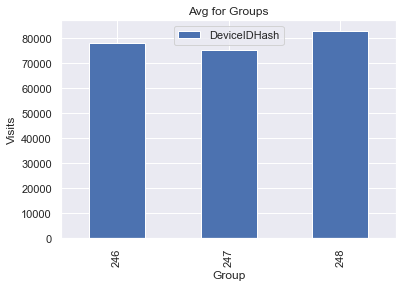

In [36]:
#how many users are there in each group 
#visits by group
order_avg = new_data.drop(['date'], axis=1).groupby('ExpId', as_index=False).agg({'DeviceIDHash' : 'count'})
display(order_avg)

barplot = order_avg.plot(x='ExpId', kind='bar')
plt.title('Avg for Groups')
plt.ylabel('Visits', fontsize=12)
plt.xlabel('Group', fontsize=12)


In [37]:
#is there a statistically significant difference between control groups 246 and 247

import scipy.stats as stats

print("{0:.3f}".format(stats.mannwhitneyu(order_avg[order_avg['ExpId']==246]['DeviceIDHash'], order_avg[order_avg['ExpId']==247]['DeviceIDHash'])[1]))
print("{0:.3f}".format(order_avg[order_avg['ExpId']==247]['DeviceIDHash'].mean()/order_avg[order_avg['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(order_avg[order_avg['ExpId']==246]['DeviceIDHash'], order_avg[order_avg['ExpId']==247]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 247")

0.500
-0.034
p-value:  0.5
H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 247


In [38]:
#what is the most popular event
pop_event = new_data.drop(['date'], axis=1).groupby('EventName', as_index=False).agg({'DeviceIDHash' : 'count'})
display(pop_event)

,EventName,DeviceIDHash
0,CartScreenAppear,41934
1,MainScreenAppear,114185
2,OffersScreenAppear,45367
3,PaymentScreenSuccessful,33628
4,Tutorial,985


##### Conclusion
most popular event is Main Screen Appear

In [39]:
#number of users who performed event name #mainscreenappear
userswhoperformedmainscreen =  new_data.query('EventName == "MainScreenAppear"')
userswhoperformedmainscreen        

,EventName,DeviceIDHash,EventTimestamp,ExpId,date_time,date,time,event_year,event_month,duration_start,duration_end,session_duration
7622,MainScreenAppear,1180716372926977637,1564642801,247,2019-08-01 00:00:01,2019-08-01,00:00:01,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7623,MainScreenAppear,3848171933939347005,1564642802,246,2019-08-01 00:00:02,2019-08-01,00:00:02,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7624,MainScreenAppear,4499584756672479930,1564642809,246,2019-08-01 00:00:09,2019-08-01,00:00:09,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7625,MainScreenAppear,7221645881620243073,1564642809,248,2019-08-01 00:00:09,2019-08-01,00:00:09,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
7627,MainScreenAppear,8361410115196303299,1564642816,248,2019-08-01 00:00:16,2019-08-01,00:00:16,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
...,...,...,...,...,...,...,...,...,...,...,...,...
244120,MainScreenAppear,5746969938801999050,1565212331,246,2019-08-07 14:12:11,2019-08-07,14:12:11,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
244121,MainScreenAppear,4599628364049201812,1565212345,247,2019-08-07 14:12:25,2019-08-07,14:12:25,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
244122,MainScreenAppear,5849806612437486590,1565212439,246,2019-08-07 14:13:59,2019-08-07,14:13:59,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41
244123,MainScreenAppear,5746969938801999050,1565212483,246,2019-08-07 14:14:43,2019-08-07,14:14:43,2019,8,2019-07-24 21:43:36,2019-08-07 14:15:17,13 days 16:31:41


In [40]:
userswhoperformedmainscreen.pivot_table(index='ExpId',values='DeviceIDHash',aggfunc='count').sort_values(by='DeviceIDHash', ascending=True).reset_index()

,ExpId,DeviceIDHash
0,246,36758
1,247,37978
2,248,39449


In [41]:
#Check whether the difference between the groups is statistically significant for MainScreenAppear. 

print("{0:.3f}".format(stats.mannwhitneyu(userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==246]['DeviceIDHash'], userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==247]['DeviceIDHash'])[1]))
print("{0:.3f}".format(userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==247]['DeviceIDHash'].mean()/userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==246]['DeviceIDHash'], userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==247]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 247")

0.000
0.019
p-value:  3.8345228568008216e-06
H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247


In [42]:
#Repeat the procedure for all other events (it will save time if you create a special function for this test). 
#Can you confirm that the groups were split properly?

# event names
def data_by_event_name(EventName):
    """
    Labels users by number of days until first order.
    """
    if EventName == 'CartScreenAppear':
        return 'Cart'
    if EventName == 'MainScreenAppear':
        return 'Main'
    if EventName == 'OffersScreenAppear':
        return 'Offers'
    if EventName == 'PaymentScreenSuccessful':
        return 'Payment'
    else:
        return 'Tutorial'


new_data['days_to_order_group'] = new_data['EventName'].apply(data_by_event_name)

event_data_pivot = new_data.pivot_table(index=['EventName', 'ExpId'], columns='days_to_order_group', values='DeviceIDHash', aggfunc='nunique', fill_value=0)
display(event_data_pivot)

days_to_order_group            Cart  Main  Offers  Payment  Tutorial
EventName               ExpId                                       
CartScreenAppear        246    1264     0       0        0         0
                        247    1234     0       0        0         0
                        248    1227     0       0        0         0
MainScreenAppear        246       0  2439       0        0         0
                        247       0  2471       0        0         0
                        248       0  2481       0        0         0
OffersScreenAppear      246       0     0    1534        0         0
                        247       0     0    1510        0         0
                        248       0     0    1527        0         0
PaymentScreenSuccessful 246       0     0       0     1198         0
                        247       0     0       0     1154         0
                        248       0     0       0     1178         0
Tutorial                246       0     0       0        0       274
                        247       0     0       0        0       275
                        248       0     0       0        0       273

In [43]:
#Check whether the difference between the groups is statistically significant for CartScreenAppear. 
CartScreenAppear =  new_data.query('EventName == "CartScreenAppear"')
offersscreenappear =  new_data.query('EventName == "OffersScreenAppear"') 
paymentsscreenappear =  new_data.query('EventName == "PaymentScreenSuccessful"') 
tutoriascreenappear =  new_data.query('EventName == "Tutorial"') 

In [44]:
#Check whether the difference between the groups is statistically significant for CartScreenAppear.  

print("{0:.3f}".format(stats.mannwhitneyu(CartScreenAppear[CartScreenAppear['ExpId']==246]['DeviceIDHash'], CartScreenAppear[CartScreenAppear['ExpId']==247]['DeviceIDHash'])[1]))
print("{0:.3f}".format(CartScreenAppear[CartScreenAppear['ExpId']==247]['DeviceIDHash'].mean()/CartScreenAppear[CartScreenAppear['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(CartScreenAppear[CartScreenAppear['ExpId']==246]['DeviceIDHash'], CartScreenAppear[CartScreenAppear['ExpId']==247]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 247")

0.000
0.033
p-value:  1.4440537532623413e-06
H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247


In [45]:
#Check whether the difference between the groups is statistically significant for OffersScreenAppear.

print("{0:.3f}".format(stats.mannwhitneyu(offersscreenappear[offersscreenappear['ExpId']==246]['DeviceIDHash'], offersscreenappear[offersscreenappear['ExpId']==247]['DeviceIDHash'])[1]))
print("{0:.3f}".format(offersscreenappear[offersscreenappear['ExpId']==247]['DeviceIDHash'].mean()/offersscreenappear[offersscreenappear['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(offersscreenappear[offersscreenappear['ExpId']==246]['DeviceIDHash'], offersscreenappear[offersscreenappear['ExpId']==247]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 247")

0.000
0.064
p-value:  6.205124818189321e-20
H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247


In [46]:
#Check whether the difference between the groups is statistically significant for PaymentScreenSuccessful.

print("{0:.3f}".format(stats.mannwhitneyu(paymentsscreenappear[paymentsscreenappear['ExpId']==246]['DeviceIDHash'], paymentsscreenappear[paymentsscreenappear['ExpId']==247]['DeviceIDHash'])[1]))
print("{0:.3f}".format(paymentsscreenappear[paymentsscreenappear['ExpId']==247]['DeviceIDHash'].mean()/paymentsscreenappear[paymentsscreenappear['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(paymentsscreenappear[paymentsscreenappear['ExpId']==246]['DeviceIDHash'], paymentsscreenappear[paymentsscreenappear['ExpId']==247]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 247")

0.001
0.025
p-value:  0.001079152432141321
H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247


In [47]:
#Check whether the difference between the groups is statistically significant for Tutorial.

print("{0:.3f}".format(stats.mannwhitneyu(tutoriascreenappear[tutoriascreenappear['ExpId']==246]['DeviceIDHash'], tutoriascreenappear[tutoriascreenappear['ExpId']==247]['DeviceIDHash'])[1]))
print("{0:.3f}".format(tutoriascreenappear[tutoriascreenappear['ExpId']==247]['DeviceIDHash'].mean()/tutoriascreenappear[tutoriascreenappear['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(tutoriascreenappear[tutoriascreenappear['ExpId']==246]['DeviceIDHash'], tutoriascreenappear[tutoriascreenappear['ExpId']==247]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 247")

0.448
0.006
p-value:  0.44791994786089
H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 247


In [48]:
#Do the same thing for the group with altered fonts. 
#Check whether the difference between the groups is statistically significant for Tutorial.

print("{0:.3f}".format(stats.mannwhitneyu(tutoriascreenappear[tutoriascreenappear['ExpId']==247]['DeviceIDHash'], tutoriascreenappear[tutoriascreenappear['ExpId']==248]['DeviceIDHash'])[1]))
print("{0:.3f}".format(tutoriascreenappear[tutoriascreenappear['ExpId']==248]['DeviceIDHash'].mean()/tutoriascreenappear[tutoriascreenappear['ExpId']==247]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(tutoriascreenappear[tutoriascreenappear['ExpId']==247]['DeviceIDHash'], tutoriascreenappear[tutoriascreenappear['ExpId']==248]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 247 and Group 248")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 247 and Group 248")

0.365
0.012
p-value:  0.36539771042510094
H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 247 and Group 248


In [49]:
#Do the same thing for the group with altered fonts. 
#Check whether the difference between the groups is statistically significant for PaymentScreenSuccessful.

print("{0:.3f}".format(stats.mannwhitneyu(paymentsscreenappear[paymentsscreenappear['ExpId']==247]['DeviceIDHash'], paymentsscreenappear[paymentsscreenappear['ExpId']==248]['DeviceIDHash'])[1]))
print("{0:.3f}".format(paymentsscreenappear[paymentsscreenappear['ExpId']==248]['DeviceIDHash'].mean()/paymentsscreenappear[paymentsscreenappear['ExpId']==247]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(paymentsscreenappear[paymentsscreenappear['ExpId']==247]['DeviceIDHash'], paymentsscreenappear[paymentsscreenappear['ExpId']==248]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 247 and Group 248")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 247 and Group 248")

0.001
0.017
p-value:  0.0012261571229397479
H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 247 and Group 248


In [50]:
#Do the same thing for the group with altered fonts. 
#Check whether the difference between the groups is statistically significant for OffersScreenAppear.

print("{0:.3f}".format(stats.mannwhitneyu(offersscreenappear[offersscreenappear['ExpId']==247]['DeviceIDHash'], offersscreenappear[offersscreenappear['ExpId']==248]['DeviceIDHash'])[1]))
print("{0:.3f}".format(offersscreenappear[offersscreenappear['ExpId']==248]['DeviceIDHash'].mean()/offersscreenappear[offersscreenappear['ExpId']==247]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(offersscreenappear[offersscreenappear['ExpId']==247]['DeviceIDHash'], offersscreenappear[offersscreenappear['ExpId']==248]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 247 and Group 248")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 247 and Group 248")

0.423
-0.002
p-value:  0.4232033818519519
H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 247 and Group 248


In [51]:
#Do the same thing for the group with altered fonts. 
#Check whether the difference between the groups is statistically significant for CartScreenAppear.  

print("{0:.3f}".format(stats.mannwhitneyu(CartScreenAppear[CartScreenAppear['ExpId']==247]['DeviceIDHash'], CartScreenAppear[CartScreenAppear['ExpId']==248]['DeviceIDHash'])[1]))
print("{0:.3f}".format(CartScreenAppear[CartScreenAppear['ExpId']==248]['DeviceIDHash'].mean()/CartScreenAppear[CartScreenAppear['ExpId']==247]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(CartScreenAppear[CartScreenAppear['ExpId']==247]['DeviceIDHash'], CartScreenAppear[CartScreenAppear['ExpId']==248]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 247 and Group 248")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 247 and Group 248")

0.041
0.008
p-value:  0.041413828221307646
H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 247 and Group 248


In [52]:
#Do the same thing for the group with altered fonts. 
#Check whether the difference between the groups is statistically significant for MainScreenAppear. 

print("{0:.3f}".format(stats.mannwhitneyu(userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==247]['DeviceIDHash'], userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==248]['DeviceIDHash'])[1]))
print("{0:.3f}".format(userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==248]['DeviceIDHash'].mean()/userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==247]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==247]['DeviceIDHash'], userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==248]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 247 and Group 248")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 247 and Group 248")

0.000
-0.022
p-value:  1.8126011450928028e-08
H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 247 and Group 248


In [53]:
#Do the same thing for the group with altered fonts. 
#Check whether the difference between the groups is statistically significant for Tutorial.

print("{0:.3f}".format(stats.mannwhitneyu(tutoriascreenappear[tutoriascreenappear['ExpId']==246]['DeviceIDHash'], tutoriascreenappear[tutoriascreenappear['ExpId']==248]['DeviceIDHash'])[1]))
print("{0:.3f}".format(tutoriascreenappear[tutoriascreenappear['ExpId']==248]['DeviceIDHash'].mean()/tutoriascreenappear[tutoriascreenappear['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(tutoriascreenappear[tutoriascreenappear['ExpId']==246]['DeviceIDHash'], tutoriascreenappear[tutoriascreenappear['ExpId']==248]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 248")


0.330
0.019
p-value:  0.32992320197757297
H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 248


In [54]:
#Do the same thing for the group with altered fonts. 
#Check whether the difference between the groups is statistically significant for PaymentScreenSuccessful.

print("{0:.3f}".format(stats.mannwhitneyu(paymentsscreenappear[paymentsscreenappear['ExpId']==246]['DeviceIDHash'], paymentsscreenappear[paymentsscreenappear['ExpId']==248]['DeviceIDHash'])[1]))
print("{0:.3f}".format(paymentsscreenappear[paymentsscreenappear['ExpId']==248]['DeviceIDHash'].mean()/paymentsscreenappear[paymentsscreenappear['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(paymentsscreenappear[paymentsscreenappear['ExpId']==246]['DeviceIDHash'], paymentsscreenappear[paymentsscreenappear['ExpId']==248]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 248")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 248")

0.000
0.042
p-value:  1.2467600041978362e-06
H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 248


In [55]:
#Do the same thing for the group with altered fonts. 
#Check whether the difference between the groups is statistically significant for OffersScreenAppear.

print("{0:.3f}".format(stats.mannwhitneyu(offersscreenappear[offersscreenappear['ExpId']==246]['DeviceIDHash'], offersscreenappear[offersscreenappear['ExpId']==248]['DeviceIDHash'])[1]))
print("{0:.3f}".format(offersscreenappear[offersscreenappear['ExpId']==248]['DeviceIDHash'].mean()/offersscreenappear[offersscreenappear['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(offersscreenappear[offersscreenappear['ExpId']==246]['DeviceIDHash'], offersscreenappear[offersscreenappear['ExpId']==248]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 248")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 248")

0.000
0.062
p-value:  9.648337196339464e-20
H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 248


In [56]:
#Do the same thing for the group with altered fonts. 
#Check whether the difference between the groups is statistically significant for CartScreenAppear.  

print("{0:.3f}".format(stats.mannwhitneyu(CartScreenAppear[CartScreenAppear['ExpId']==246]['DeviceIDHash'], CartScreenAppear[CartScreenAppear['ExpId']==248]['DeviceIDHash'])[1]))
print("{0:.3f}".format(CartScreenAppear[CartScreenAppear['ExpId']==248]['DeviceIDHash'].mean()/CartScreenAppear[CartScreenAppear['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(CartScreenAppear[CartScreenAppear['ExpId']==246]['DeviceIDHash'], CartScreenAppear[CartScreenAppear['ExpId']==248]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 248")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 248")

0.000
0.041
p-value:  1.4169699178905393e-08
H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 248


In [57]:
#Do the same thing for the group with altered fonts. 
#Check whether the difference between the groups is statistically significant for MainScreenAppear. 

print("{0:.3f}".format(stats.mannwhitneyu(userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==246]['DeviceIDHash'], userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==248]['DeviceIDHash'])[1]))
print("{0:.3f}".format(userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==248]['DeviceIDHash'].mean()/userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==246]['DeviceIDHash'], userswhoperformedmainscreen[userswhoperformedmainscreen['ExpId']==248]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 248")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 248")

0.197
-0.003
p-value:  0.1971108954318036
H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 248


In [58]:
print("{0:.3f}".format(stats.mannwhitneyu(tutoriascreenappear[tutoriascreenappear['ExpId']==246]['DeviceIDHash'], tutoriascreenappear[tutoriascreenappear['ExpId']==247]['DeviceIDHash'])[1]))
print("{0:.3f}".format(tutoriascreenappear[tutoriascreenappear['ExpId']==247]['DeviceIDHash'].mean()/tutoriascreenappear[tutoriascreenappear['ExpId']==246]['DeviceIDHash'].mean()-1)) 

alpha = .05 #significance level

results2 = st.mannwhitneyu(tutoriascreenappear[tutoriascreenappear['ExpId']==246]['DeviceIDHash'], tutoriascreenappear[tutoriascreenappear['ExpId']==247]['DeviceIDHash'])

print('p-value: ', results2.pvalue)

if (results2.pvalue < alpha):
    print("H1 (the alternative hypothesis): there is a statistically significant difference in average order size between Group 246 and Group 247")
else:
    print("H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 247")

0.448
0.006
p-value:  0.44791994786089
H0 (the null hypothesis): there's not a statistically significant difference in average order size between Group 246 and Group 247


##### What conclusions can you draw from the experiment?

When conducting the AA test agains 246 and 247 we found that there were statistical significances for payment, offers cart and main screens

When conducting the AA test against 247 and 248 we found that there were statistidal significances for payment, cart and main screens

when conducting the AA test against 246 and 248 we found that there were statstical significances for payment, offers and cart screens 

##### General Conclusion
- Statistical significance level was .05 because it is typically indicates strong evidence against the null hypothesis because there is less than 5% probablity the null is correct (and the results are random).  
- I have carried out 16 statistical hypothesis tests. 
- I feel my statistical significance level is appropriate for this test. It determins that the main motivators for users behavior are offers, cart and main screens based on the test results. 

### Project Conclusion

- When we started assessing the population of this experiment, we were able to determine that there were 2437130 events in the logs that included dates from 07/25-08/07/2019.
- The average number of users in the logs were 7551. 
- The users that were accessing the site before 07/31 might have experienced technical issues, prior marketing campaigns or simply because the product we were offering did not capture the users interest. 
- Average events per user were around 32 before we started evaluating the date ranges after 07/31/2019.
- We were able to create a table that demonstrated the average period users were accessing the data was between 07/31-08/07/2019. So, we created a funnel to eliminate the data that wasn’t pertaining to our experiment. We decided to remove the users outside of this date range because it was .01% of the total users. 
- When we funneled out the data, we realized that the test group 248 comprised most of the users accessing the data. 246 was second greatest number of users followed by 247.
- We can see that when we investigate the funnel of new users we see that the total users who ended up taking steps to get a special offer from going to the main screen were 6412 out of the 7439 (54% conversion!) visits to the site. Then out of the 6412, we had 4103 who added the product to the cart (29% of the users who were offered the special offer). Then out of that 4103 we had 1865 who started the check out process (12%). Lastly out of the 1865 we had 443 who completed purchases. (28%). then out of that 390 we had 130 complete the tutorial which was .09%. Ultimately each time users were provided an oppourtunity there was a chance they were going to take it.. which increased the likelihood of users making a purchase. The share of the users who made the journey from visit to purchase was .09%
- Out of these test groups we saw that the highest number of users were accessing the main screen but did not proceed through to payment. This might have been because the offers were not enticing enough to pursue the purchase. This is where we had to evaluate the statistical significance of each group by performing Mann Whitney tests. 
- When conducting the AA test against 246 and 247 we found that there were statistical significances for payment, offers cart and main screens.
- When conducting the AA test against 247 and 248 we found that there were statistical significances for payment, cart and main screens.
- when conducting the AA test against 246 and 248 we found that there were statistical significances for payment, offers and cart screens.
- With this data in mind, it would be wise for the marketing team to entice users with font changes in payment screen and Cart screen. Changing the fonts in the offers screen and the main screen didn't make much difference. We can base this off the amount of time the users visit the site and add items to the cart but never go back to purchase. Changing the fonts in the cart screen and the payment screen and enticing users with offers when items are in the cart, but not purchased immediately might be a good marketing tactic to gain business.  

